In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Input,Dense
from keras import backend as K
from keras.optimizers import RMSprop, Adam
from sklearn.model_selection import KFold


### Train Models

In [2]:
# Load x_train, x_test, y_train, y_test from the file respective csv files
x_train = pd.read_csv('Processed_datasets/reduced_x_train.csv')
x_val = pd.read_csv('Processed_datasets/reduced_x_val.csv')
x_test = pd.read_csv('Processed_datasets/reduced_x_test.csv')
y_train = pd.read_csv('Processed_datasets/y_train.csv')
y_val = pd.read_csv('Processed_datasets/y_val.csv')
y_test = pd.read_csv('Processed_datasets/y_test.csv')

In [3]:
print(f"Shape of x_train = {x_train.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of x_val  = {x_val.shape}")
print(f"Shape of y_val  = {y_val.shape}")
print(f"Shape of x_test  = {x_test.shape}")
print(f"Shape of y_test  = {y_test.shape}")

Shape of x_train = (102354, 4)
Shape of y_train = (102354, 1)
Shape of x_val  = (20470, 4)
Shape of y_val  = (20470, 1)
Shape of x_test  = (13648, 4)
Shape of y_test  = (13648, 1)


In [4]:
# Converting to 1d array
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

#### Train the dataset using the following models:

1. Linear Regression
2. Random Forest Regression
3. Extreme Gradient Boosting ( XGBoost )
4. ADABoost.R2 ( Adaptive Boosting Regression )
5. Artificial Neural Network (ANN)

For each model we take the value of 'n_estimators' as 1000.

#### Model 1: Linear Regression

In [5]:
# We begin by training the model using Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

LinearRegression()

#### Model 2: Random Forest Regression

In [6]:
random_forest_model = RandomForestRegressor( n_estimators = 1000, max_depth = 5) # default criterion = squared error
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000)

#### Model 3: Extreme Gradient Boosting ( XGBoost )

XGBoost is an ensemble learning ML model which creates the final model by combining the predictions od several weak models.

In [7]:
XG_boosting_model = xgb.XGBRegressor( objective = 'reg:squarederror', n_estimators = 1000, early_stopping_rounds = 20 ,
                                    learning_rate = 0.01, min_child_weight = 5,
                                    max_depth = 5)
# early stopping is used to prevent overfitting of the model. By comparing the error of the 
# model on the validation set, we can stop the training of the model when the error starts to increase.
XG_boosting_model.fit(x_train, y_train, eval_set=[(x_val, y_val)], verbose=False ) 


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Model 4: ADABoost.R2 ( Adaptive Boosting Regression )

In [8]:
adaboost_model = AdaBoostRegressor(n_estimators = 1000,loss='square')  
adaboost_model.fit(x_train, y_train)

AdaBoostRegressor(loss='square', n_estimators=1000)

#### Model 5: Artificial Neural Network ( ANN )

Case 1 : With RMSprop Optimizer

RMSprop stands for Root Mean Square Propagation.
RMSprop is an optimizer that utilizes the magnitude of recent gradients to normalize the gradients.
RMSprop divides the learning rate by an exponentially decaying average of squared gradients.


In [22]:

ANN_model_1 = Sequential()
ANN_model_1.add( Dense(64, input_dim = 4, activation = 'relu' ) )
ANN_model_1.add( Dense(32, activation = 'relu') )
ANN_model_1.add( Dense(1, activation = 'linear') )
ANN_model_1.compile( loss='mean_squared_error', optimizer='RMSprop', metrics=['mse'] )
history_1 = ANN_model_1.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


c:\Users\karti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 745us/step - loss: 39725.2383 - mse: 39725.2383 - val_loss: 6041.0659 - val_mse: 6041.0659
Epoch 2/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 741us/step - loss: 6808.2144 - mse: 6808.2144 - val_loss: 6984.0825 - val_mse: 6984.0825
Epoch 3/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 736us/step - loss: 2113.8201 - mse: 2113.8201 - val_loss: 818.4824 - val_mse: 818.4824
Epoch 4/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 735us/step - loss: 953.3846 - mse: 953.3846 - val_loss: 380.0439 - val_mse: 380.0439
Epoch 5/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 745us/step - loss: 603.6558 - mse: 603.6558 - val_loss: 783.1915 - val_mse: 783.1915
Epoch 6/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - loss: 525.8519 - mse: 525.8519 - val_loss: 570.4763 - val_mse: 570.4763
Epoch 7/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - loss: 416.7019 - mse: 416.7019 - val_loss: 289.2697 - val_mse: 289.2697
Epoch 8/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - loss: 346.3529 - mse: 346.3529 

Case 2 : With Adam Optmizer

 Adam optimizer referes to Adaptive Moment Estimation, is an optimization algorithm that can be used 
 instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
    It computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.

In [10]:

ANN_model_2 = Sequential()
# ANN_model_2.add(Input(shape=(4,)))  # Input layer with shape (4,)
ANN_model_2.add( Dense(64, input_dim=4, activation = 'relu' ) )
ANN_model_2.add( Dense(32, activation = 'relu') )
ANN_model_2.add( Dense(1, activation = 'linear') )

ANN_model_2.compile( loss='mean_squared_error', optimizer='adam', metrics=['mse'] )
history_2 = ANN_model_2.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


c:\Users\karti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2559/2559 ━━━━━━━━━━━━━━━━━━━━ 3s 825us/step - loss: 33428.1523 - mse: 33428.1523 - val_loss: 7953.1753 - val_mse: 7953.1753
Epoch 2/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - loss: 5764.3032 - mse: 5764.3032 - val_loss: 2193.2781 - val_mse: 2193.2781
Epoch 3/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 757us/step - loss: 2368.3452 - mse: 2368.3452 - val_loss: 1087.1676 - val_mse: 1087.1676
Epoch 4/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 715us/step - loss: 1208.5195 - mse: 1208.5195 - val_loss: 781.5748 - val_mse: 781.5748
Epoch 5/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 711us/step - loss: 947.9952 - mse: 947.9952 - val_loss: 1328.5195 - val_mse: 1328.5195
Epoch 6/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - loss: 581.4105 - mse: 581.4105 - val_loss: 698.9441 - val_mse: 698.9441
Epoch 7/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 703us/step - loss: 447.2263 - mse: 447.2263 - val_loss: 507.8929 - val_mse: 507.8929
Epoch 8/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - loss: 366.5049 - mse: 366

### Testing on Validation Set

In [23]:
# Predicting the values
y_pred_linear_regression = linear_regression_model.predict(x_val)
y_pred_random_forest = random_forest_model.predict(x_val)
y_pred_xgboost = XG_boosting_model.predict(x_val)
y_pred_adaboost = adaboost_model.predict(x_val)
y_pred_ann_1 = ANN_model_1.predict(x_val)
y_pred_ann_2 = ANN_model_2.predict(x_val)

640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step


In [24]:
x_val.describe()

,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,20470.000000,20470.000000,20470.000000,20470.000000
mean,1681.356730,26.747663,31.834191,0.228798
std,3193.841339,3.873659,11.729453,0.303954
min,0.000000,20.398505,18.140415,0.000000
25%,0.000000,23.656800,22.392478,0.000000
50%,4.453333,25.892039,26.331181,0.023626
75%,1123.153333,29.193909,40.686538,0.440297
max,14416.142860,39.181638,66.635953,1.221652


Calculation of Mean Squared Error (MSE) and R2 Score for each model:

In [34]:
# Calculating MSE for each prediciton
mse_linear_regression = mean_squared_error(y_val, y_pred_linear_regression)
mse_random_forest = mean_squared_error(y_val, y_pred_random_forest)
mse_xgboost = mean_squared_error(y_val, y_pred_xgboost)
mse_adaboost = mean_squared_error(y_val, y_pred_adaboost)

mse_ann_rms = ANN_model_1.evaluate(x_val, y_val)[0]
mse_ann_adam = ANN_model_2.evaluate(x_val, y_val)[0] 

MSE = [mse_linear_regression, mse_random_forest, mse_adaboost, mse_xgboost, mse_ann_rms, mse_ann_adam]

640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 6.5996 - mse: 6.5996
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 3.9084 - mse: 3.9084


In [35]:
# Calculating R2 score for each prediction
r2_linear_regression = r2_score(y_val, y_pred_linear_regression)
r2_random_forest = r2_score(y_val, y_pred_random_forest)
r2_xgboost = r2_score(y_val, y_pred_xgboost)
r2_adaboost = r2_score(y_val, y_pred_adaboost)
r2_ann_rms = r2_score(y_val, y_pred_ann_1)
r2_ann_adam = r2_score(y_val, y_pred_ann_2)
R2 = [r2_linear_regression, r2_random_forest, r2_adaboost, r2_xgboost, r2_ann_rms, r2_ann_adam]

### Metric Analysis

Metrics Under Consideration:

1. Mean Squared Error 
2. r2 Score

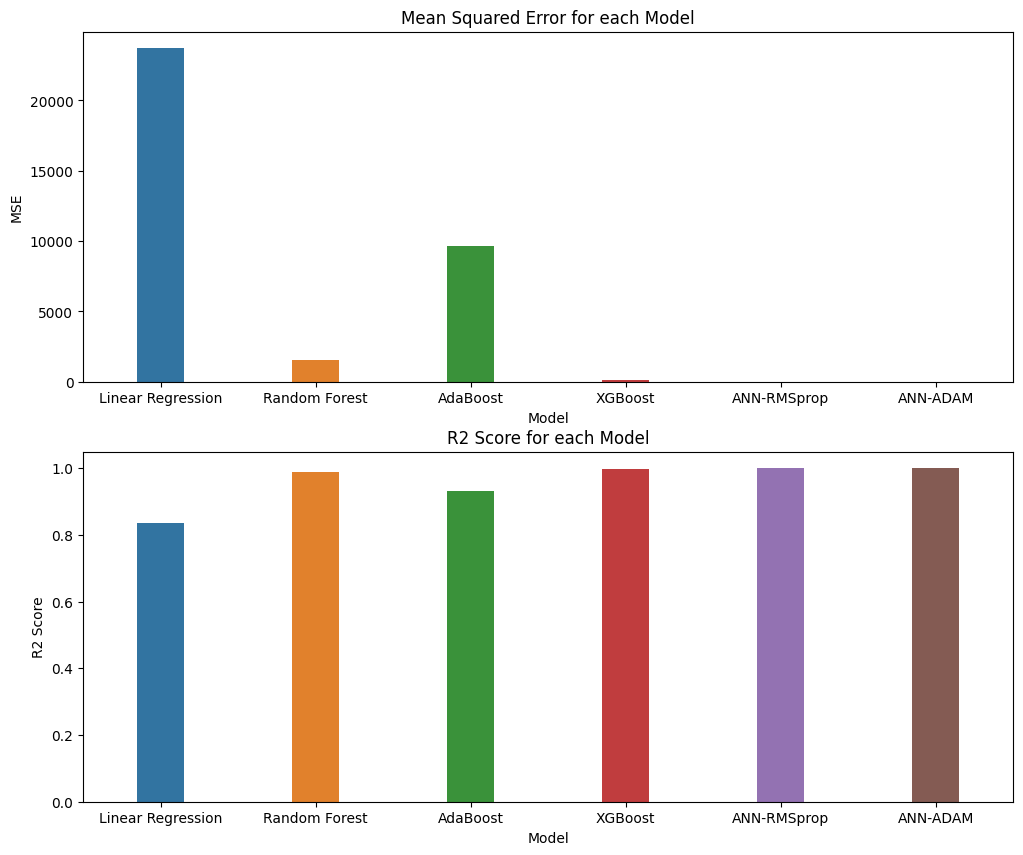

In [39]:
fig, ax = plt.subplots(2,1, figsize=(12,10))
model_names = ['Linear Regression', 'Random Forest', 'AdaBoost', 'XGBoost','ANN-RMSprop', 'ANN-ADAM']
sns.barplot(x = model_names, y = MSE, ax = ax[0], width = 0.3, hue = model_names )
ax[0].set_title("Mean Squared Error for each Model")
ax[0].set_ylabel("MSE")
ax[0].set_xlabel("Model")
sns.barplot(x = model_names, y = R2, ax = ax[1], width = 0.3, hue = model_names)
ax[1].set_title("R2 Score for each Model")
ax[1].set_ylabel("R2 Score")
ax[1].set_xlabel("Model")
plt.show()



Plotting separately fro MSE Vs Epochs in case of Artificial Neural Network with RMSprop and Adam Optimizer.

Text(0.5, 1.0, 'ANN with RMSprop as optimizer')

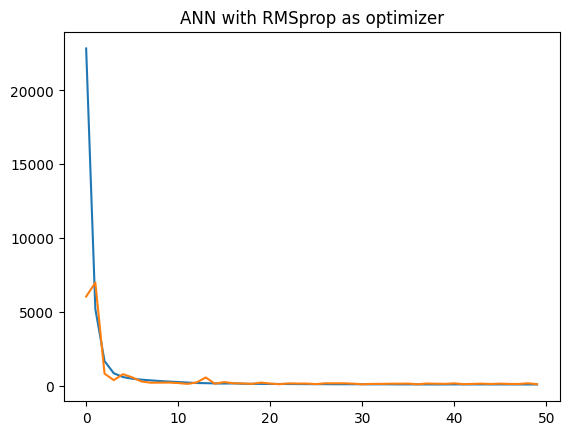

In [43]:
#plot mse for ann with rmsprop as optimizer during training and validation
plt.plot(history_1.history['mse'])
plt.plot(history_1.history['val_mse'])
plt.title('ANN with RMSprop as optimizer')

Text(0.5, 1.0, 'ANN with Adam as optimizer')

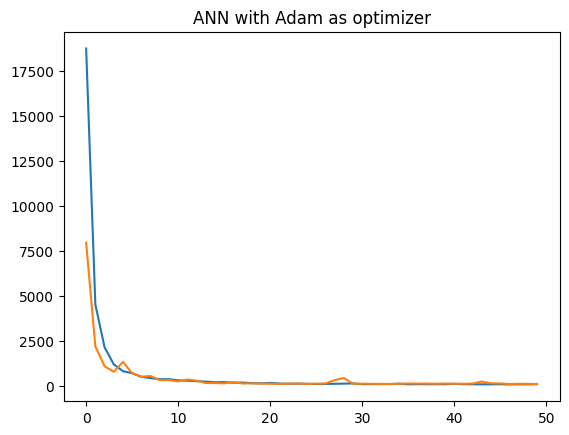

In [42]:
plt.plot(history_2.history['mse']) #plot mse for ann with adam as optimizer during training and validation
plt.plot(history_2.history['val_mse'])
plt.title('ANN with Adam as optimizer')

In [46]:
print("Model\t\t\tMSE\t\t\tR2-Score")
print(f"Linear Regression\t{MSE[0]}\t{R2[0]}")
print(f"AdaBoost\t\t{MSE[2]}\t{R2[2]}")
print(f"Random Forest\t\t{MSE[1]}\t{R2[1]}")
print(f"XGBoost\t\t\t{MSE[3]}\t{R2[3]}")
print(f"ANN-RMSprop\t\t{mse_ann_rms}\t{r2_ann_rms}")
print(f"ANN-ADAM\t\t{mse_ann_adam}\t{r2_ann_adam}")

Model			MSE			R2-Score
Linear Regression	23702.03105707854	0.8347854340561729
AdaBoost		9673.884515560754	0.9325683681967938
Random Forest		1567.5779189722532	0.9890732273178428
XGBoost			97.25812814985822	0.9993220640295302
ANN-RMSprop		6.389199256896973	0.9999554642018543
ANN-ADAM		3.589176654815674	0.999974981706623


Through the above metrics, we can determine that ANN with Adam optimizer performs best for the given dataset. 

### Prediction on Test Set

In [47]:
# Using the best model to predict the test data
y_pred_test = ANN_model_2.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


In [48]:
print(f"Test MSE = {mse_test}")
print(f"Test R2-Score = {r2_test}")

Test MSE = 52.405997841880406
Test R2-Score = 0.9996363812549245


#### Further Improvement on the ANN model by tuning the hyperparameters using K-fold Cross Validation.

In [55]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(4,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model


In [58]:

epochs_list = [10,20,30,40,50]
n_folds = 5
kf = KFold(n_splits = n_folds, shuffle=True)

best_score = None
best_epochs = None
xtrain = pd.DataFrame(x_train)
ytrain = pd.DataFrame(y_train)

for epochs in epochs_list:
   
    mse_scores = []
    for train_index, test_index in kf.split(x_train):
        train_x, test_x = xtrain.iloc[train_index], xtrain.iloc[test_index]
        train_y, test_y = ytrain.iloc[train_index], ytrain.iloc[test_index]
        model = create_model()

        history = model.fit(train_x, train_y, epochs=epochs, batch_size=32, verbose=0)
        mse = mean_squared_error(test_y, model.predict(test_x))
        mse_scores.append(mse)

    avg_mse = np.mean(mse_scores)
    
    print(f"Average MSE for {n_folds} folds with {epochs} epochs: {avg_mse}")
    if best_score is None or avg_mse < best_score:
        best_score = avg_mse
        best_epochs = epochs

print("Optimum Number of Epochs: ", best_epochs)
print("Corresponding MSE: ",best_score)

640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
Average MSE for 5 folds with 10 epochs: 325.86470591310007
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
Average MSE for 5 folds with 20 epochs: 143.36061803370492
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
Average MSE for 5 folds with 30 epochs: 165.06228130615318
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
640/64

In [59]:
epochs_list = [60,70,80,90,100]
kf = KFold(n_splits = n_folds, shuffle=True)
for epochs in epochs_list:
   
    mse_scores = []
    for train_index, test_index in kf.split(x_train):
        train_x, test_x = xtrain.iloc[train_index], xtrain.iloc[test_index]
        train_y, test_y = ytrain.iloc[train_index], ytrain.iloc[test_index]
        model = create_model()

        history = model.fit(train_x, train_y, epochs=epochs, batch_size=32, verbose=0)
        mse = mean_squared_error(test_y, model.predict(test_x))
        mse_scores.append(mse)

    avg_mse = np.mean(mse_scores)
    
    print(f"Average MSE for {n_folds} folds with {epochs} epochs: {avg_mse}")
    if best_score is None or avg_mse < best_score:
        best_score = avg_mse
        best_epochs = epochs

print("Optimum Number of Epochs: ", best_epochs)
print("Corresponding MSE: ",best_score)

640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
Average MSE for 5 folds with 60 epochs: 111.69669287913534
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
Average MSE for 5 folds with 70 epochs: 76.80766847050236
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
Average MSE for 5 folds with 80 epochs: 79.95197334627349
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
640/640 

Note that the MSE reduces significantly from epochs = 10 to epochs = 100.